<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/Algo_trading_SH56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader

!pip install PyPortfolioOpt
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import copy
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as pdr
import yfinance as yfin

## Get Stock Prices using pandas_datareader Library
Let's get some data for the stock tickers that we want to include in our portfolio. The pandas-datareader library provides a method to pull stock price data from the web and store it in a DataFrame.

If you do not pass in the start and end dates, stock prices will be given for the full date range available. Note that the date range may be different for different stocks depending on when they were listed.

In [ ]:
yfin.pdr_override()

In [ ]:
start_date = "2018-07-01"
end_date = "2023-05-14"

tickers = ['ADANIGREEN.BO', 'ADANIPOWER.BO', 'ATLANTA.BO', 'AUROPHARMA.BO', 'AXISBANK.BO', 'BHEL.BO', 'BAJAJFINSV.BO', 'BEL.BO', 'BIOCON.BO', 'CHENNPETRO.BO', 'CARERATING.BO', 'CIPLA.BO', 'COALINDIA.BO', 'ENVAIREL.BO', 'GMRINFRA.BO', 'GMRP&UI.BO', 'HDFC.BO', 'HCC.BO', 'HNDFDS.BO', 'IDFC.BO', 'IRCTC.BO', 'ICICIPRULI.BO', 'IDFCFIRSTB.BO', 'INDIACEM.BO', 'INFY.BO', 'IRB.BO', 'ITC.BO', 'JMFINANCIL.BO', 'JSWENERGY.BO', 'LT.BO', 'M&M.BO', 'MGL.BO', 'MAHEPC.BO', 'MHRIL.BO', 'MANGLMCEM.BO', 'MARICO.BO', 'NBCC.BO', 'NMDC.BO', 'PARADEEP.BO', 'POONAWALLA.BO', 'PFC.BO', 'RVNL.BO', 'RAILTEL.BO', 'RECLTD.BO', 'REDINGTON.BO', 'SBICARD.BO', 'SHAKTIPUMP.BO', 'SBIN.BO', 'SUNPHARMA.BO', 'TATACOMM.BO', 'TATAMOTORS.BO', 'TATAMTRDVR.BO', 'TATASTEEL.BO', 'TECHM.BO', 'YESBANK.BO']
#tickers = ['TCS', 'INFY']

In [ ]:
stocks_df = pdr.get_data_yahoo(tickers, start= start_date, end=end_date)['Close']
#print(stocks_df)

[*********************100%***********************]  55 of 55 completed


In [ ]:
stocks_df.head()

ADANIGREEN.BO  ADANIPOWER.BO  ATLANTA.BO  AUROPHARMA.BO  \
Date                                                                  
2018-07-02      25.049999          15.45   38.799999     602.950012   
2018-07-03      26.250000          16.00   41.299999     627.049988   
2018-07-04      29.750000          16.10   41.000000     624.950012   
2018-07-05      29.600000          15.60   37.799999     615.950012   
2018-07-06      30.049999          16.65   38.950001     617.400024   

            AXISBANK.BO  BAJAJFINSV.BO     BEL.BO    BHEL.BO   BIOCON.BO  \
Date                                                                       
2018-07-02   512.599976     578.559998  35.200001  71.349998  307.500000   
2018-07-03   512.000000     588.664978  35.750000  70.050003  314.125000   
2018-07-04   514.299988     603.309998  34.816666  69.250000  314.075012   
2018-07-05   510.899994     607.155029  34.083332  67.900002  313.774994   
2018-07-06   514.250000     605.614990  36.950001  70.250000  315.250000   

            CARERATING.BO  ...  SBICARD.BO     SBIN.BO  SHAKTIPUMP.BO  \
Date                       ...                                          
2018-07-02    1239.449951  ...         NaN  259.100006     482.950012   
2018-07-03    1226.300049  ...         NaN  257.750000     478.299988   
2018-07-04    1250.250000  ...         NaN  257.500000     477.549988   
2018-07-05    1245.750000  ...         NaN  256.600006     474.850006   
2018-07-06    1250.800049  ...         NaN  257.450012     462.850006   

            SUNPHARMA.BO  TATACOMM.BO  TATAMOTORS.BO  TATAMTRDVR.BO  \
Date                                                                  
2018-07-02    563.549988   591.099976     267.250000     158.600006   
2018-07-03    573.650024   587.750000     269.500000     158.050003   
2018-07-04    579.049988   588.099976     267.000000     157.600006   
2018-07-05    565.700012   593.099976     261.500000     153.399994   
2018-07-06    558.450012   589.549988     271.149994     156.850006   

            TATASTEEL.BO    TECHM.BO  YESBANK.BO  
Date                                              
2018-07-02     56.095001  656.599976  337.000000  
2018-07-03     56.650002  659.900024  336.799988  
2018-07-04     56.889999  653.049988  335.500000  
2018-07-05     55.349998  646.950012  348.799988  
2018-07-06     55.415001  634.750000  352.399994  

[5 rows x 55 columns]

In [ ]:
stocks_df.tail()

ADANIGREEN.BO  ADANIPOWER.BO  ATLANTA.BO  AUROPHARMA.BO  \
Date                                                                  
2023-05-08     916.650024     238.699997       14.42     618.900024   
2023-05-09     902.200012     240.149994       14.26     614.049988   
2023-05-10     902.200012     238.100006       14.34     618.599976   
2023-05-11     913.700012     242.649994       14.31     606.049988   
2023-05-12     895.950012     241.100006       14.53     610.099976   

            AXISBANK.BO  BAJAJFINSV.BO      BEL.BO    BHEL.BO   BIOCON.BO  \
Date                                                                        
2023-05-08   878.750000    1404.750000  107.349998  81.620003  244.250000   
2023-05-09   888.299988    1407.900024  107.500000  79.470001  246.300003   
2023-05-10   890.049988    1413.750000  108.099998  80.580002  246.500000   
2023-05-11   895.650024    1419.699951  108.599998  81.050003  245.850006   
2023-05-12   910.799988    1423.400024  107.250000  81.050003  245.100006   

            CARERATING.BO  ...  SBICARD.BO     SBIN.BO  SHAKTIPUMP.BO  \
Date                       ...                                          
2023-05-08     655.450012  ...  814.900024  583.400024     422.799988   
2023-05-09     658.849976  ...  819.650024  573.450012     418.700012   
2023-05-10     658.299988  ...  824.200012  572.049988     424.200012   
2023-05-11     686.950012  ...  866.099976  573.400024     427.350006   
2023-05-12     667.000000  ...  866.650024  578.099976     424.799988   

            SUNPHARMA.BO  TATACOMM.BO  TATAMOTORS.BO  TATAMTRDVR.BO  \
Date                                                                  
2023-05-08    961.799988  1227.099976     500.200012     258.850006   
2023-05-09    957.750000  1300.099976     503.549988     259.399994   
2023-05-10    953.799988  1276.750000     509.450012     262.299988   
2023-05-11    961.250000  1277.050049     511.649994     264.350006   
2023-05-12    955.549988  1254.199951     515.650024     262.299988   

            TATASTEEL.BO     TECHM.BO  YESBANK.BO  
Date                                               
2023-05-08    109.550003  1043.000000   16.110001  
2023-05-09    109.550003  1048.150024   16.100000  
2023-05-10    109.199997  1046.199951   15.960000  
2023-05-11    108.550003  1044.150024   16.080000  
2023-05-12    106.750000  1045.900024   15.960000  

[5 rows x 55 columns]

## Plot Individual Stock Prices
The graph is plotted with plotly library. It is an interactive graph.

In [ ]:
fig_price = px.line(stocks_df, title='Price of Individual Stocks')
fig_price.show()

## Daily Returns
The daily returns of a stock is the fractional gain (or loss) on a given day relative to the previous day, it is given by (current day's close price - previous day's close price) / (previous day's close price). As it is a relative value, it provides a fairer comparison between stock returns regardless of absolute stock prices. The pct_change() method can be used to get the daily returns efficiently.

In [ ]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns.head()

ADANIGREEN.BO  ADANIPOWER.BO  ATLANTA.BO  AUROPHARMA.BO  \
Date                                                                  
2022-05-30      -0.007988       0.037765    0.017123      -0.001888   
2022-05-31      -0.116241      -0.049890    0.010101       0.004351   
2022-06-01      -0.027333      -0.049884    0.005333       0.019024   
2022-06-02       0.043668      -0.039662   -0.015915      -0.015157   
2022-06-03      -0.038313      -0.037745   -0.025606      -0.008352   

            AXISBANK.BO  BAJAJFINSV.BO    BEL.BO   BHEL.BO  BIOCON.BO  \
Date                                                                    
2022-05-30     0.007262       0.012847 -0.001947  0.008798   0.002101   
2022-05-31    -0.011751      -0.001237  0.017126 -0.006783   0.000749   
2022-06-01     0.001605      -0.024412  0.049659  0.007805  -0.019300   
2022-06-02     0.007429       0.028785 -0.002030  0.009681  -0.014950   
2022-06-03    -0.021833      -0.020858 -0.014242 -0.029722  -0.008053   

            CARERATING.BO  ...  SBICARD.BO   SBIN.BO  SHAKTIPUMP.BO  \
Date                       ...                                        
2022-05-30      -0.001615  ...    0.012738  0.011620       0.039800   
2022-05-31       0.020056  ...    0.006063 -0.014016       0.029528   
2022-06-01       0.011628  ...   -0.009809  0.000855       0.009135   
2022-06-02      -0.013793  ...    0.011525  0.003311       0.010316   
2022-06-03      -0.003602  ...   -0.010113 -0.011602      -0.015732   

            SUNPHARMA.BO  TATACOMM.BO  TATAMOTORS.BO  TATAMTRDVR.BO  \
Date                                                                  
2022-05-30     -0.017534     0.025568       0.029562       0.027704   
2022-05-31     -0.031134    -0.018959       0.003504      -0.000703   
2022-06-01     -0.023999    -0.016130       0.001915       0.001642   
2022-06-02      0.023518    -0.000309      -0.012818      -0.014286   
2022-06-03      0.006282    -0.013408      -0.016173      -0.016631   

            TATASTEEL.BO  TECHM.BO  YESBANK.BO  
Date                                            
2022-05-30      0.003882  0.035913    0.003729  
2022-05-31      0.007781  0.014563   -0.020802  
2022-06-01      0.007011 -0.028623    0.004552  
2022-06-02      0.017216 -0.000785    0.010574  
2022-06-03     -0.012578  0.001527   -0.011211  

[5 rows x 55 columns]

Let's plot out the daily returns of 2 of the stocks, Boeing (BA) and Visa (V), throughout the whole time period. We see that they tend to fluctuate gently around 0. Notably, the fluctuations are much greater during a period of high volatility (i.e. during the Covid crash in March 2020).

In [ ]:
fig = px.line(daily_returns[['ADANIGREEN.BO', 'ADANIPOWER.BO', 'ATLANTA.BO', 'AUROPHARMA.BO', 'AXISBANK.BO', 'BHEL.BO', 'BAJAJFINSV.BO', 'BEL.BO', 'BIOCON.BO', 'CHENNPETRO.BO', 'CARERATING.BO', 'CIPLA.BO', 'COALINDIA.BO', 'ENVAIREL.BO', 'GMRINFRA.BO', 'GMRP&UI.BO', 'HDFC.BO', 'HCC.BO', 'HNDFDS.BO', 'IDFC.BO', 'IRCTC.BO', 'ICICIPRULI.BO', 'IDFCFIRSTB.BO', 'INDIACEM.BO', 'INFY.BO', 'IRB.BO', 'ITC.BO', 'JMFINANCIL.BO', 'JSWENERGY.BO', 'LT.BO', 'M&M.BO', 'MGL.BO', 'MAHEPC.BO', 'MHRIL.BO', 'MANGLMCEM.BO', 'MARICO.BO', 'NBCC.BO', 'NMDC.BO', 'PARADEEP.BO', 'POONAWALLA.BO', 'PFC.BO', 'RVNL.BO', 'RAILTEL.BO', 'RECLTD.BO', 'REDINGTON.BO', 'SBICARD.BO', 'SHAKTIPUMP.BO', 'SBIN.BO', 'SUNPHARMA.BO', 'TATACOMM.BO', 'TATAMOTORS.BO', 'TATAMTRDVR.BO', 'TATASTEEL.BO', 'TECHM.BO', 'YESBANK.BO']], title='Daily Returns')
#fig = px.line(daily_returns[['TCS', 'INFY']], title='Daily Returns')

fig.show()

## Volatility

#### Daily Volatility

Daily Volatility is the average difference between the return on a given day and the average return over the time period. Mathematically, it is just the standard deviation of the daily returns. Volatility is one of the measures of risk in that highly volatile investments can carry greater risk.

In [ ]:
daily_returns.std()

ADANIGREEN.BO    0.039485
ADANIPOWER.BO    0.031492
ATLANTA.BO       0.041995
AUROPHARMA.BO    0.018539
AXISBANK.BO      0.014460
BAJAJFINSV.BO    0.019386
BEL.BO           0.018272
BHEL.BO          0.024173
BIOCON.BO        0.017081
CARERATING.BO    0.021199
CHENNPETRO.BO    0.035387
CIPLA.BO         0.013104
COALINDIA.BO     0.015299
ENVAIREL.BO      0.039217
GMRINFRA.BO      0.019726
GMRP&UI.BO       0.030302
HCC.BO           0.039886
HDFC.BO          0.013225
HNDFDS.BO        0.059497
ICICIPRULI.BO    0.017775
IDFC.BO          0.023050
IDFCFIRSTB.BO    0.021437
INDIACEM.BO      0.026146
INFY.BO          0.016030
IRB.BO           0.030826
IRCTC.BO         0.016040
ITC.BO           0.011475
JMFINANCIL.BO    0.020091
JSWENERGY.BO     0.029907
LT.BO            0.013658
M&M.BO           0.015475
MAHEPC.BO        0.020886
MANGLMCEM.BO     0.019936
MARICO.BO        0.013402
MGL.BO           0.020252
MHRIL.BO         0.021861
NBCC.BO          0.025076
NMDC.BO          0.023203
PARADEEP.BO 

Here we see that BA has a slightly higher volatility, compared to that of V. When we compare the density plots of their daily returns, we can see that V has a narrower curve with a higher peak, while BA has a wider curve indicating higher standard deviation and hence volatility.

(-0.1, 0.1)

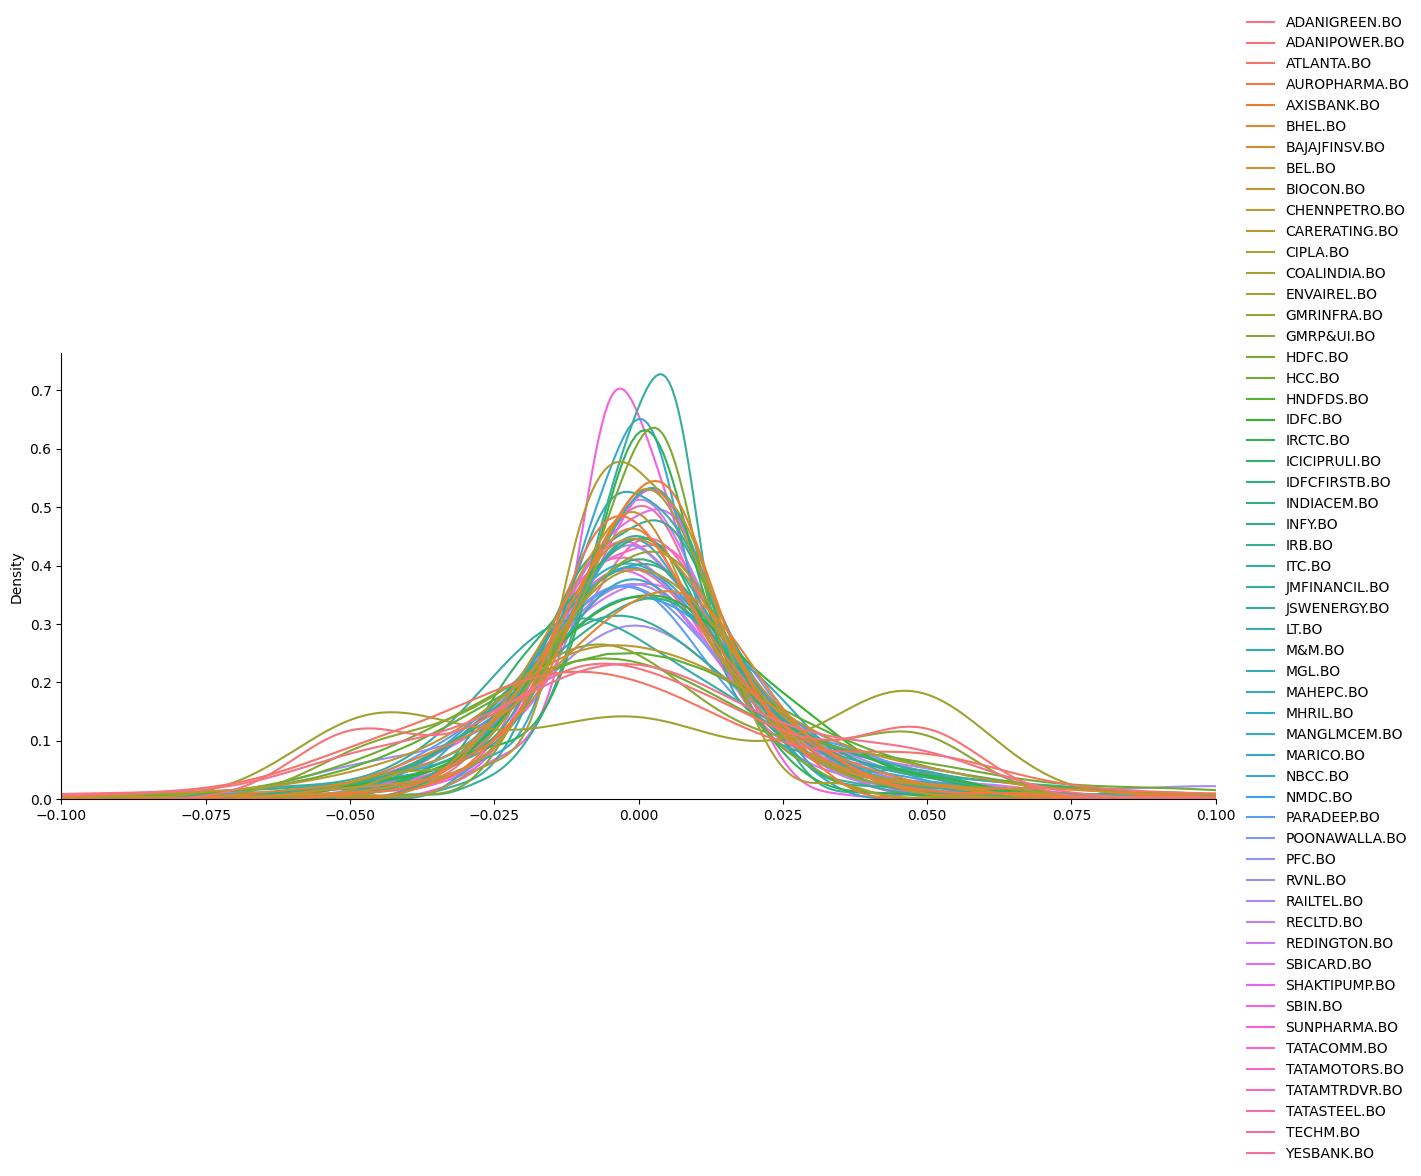

In [ ]:
sns.displot(data=daily_returns[['ADANIGREEN.BO', 'ADANIPOWER.BO', 'ATLANTA.BO', 'AUROPHARMA.BO', 'AXISBANK.BO', 'BHEL.BO', 'BAJAJFINSV.BO', 'BEL.BO', 'BIOCON.BO', 'CHENNPETRO.BO', 'CARERATING.BO', 'CIPLA.BO', 'COALINDIA.BO', 'ENVAIREL.BO', 'GMRINFRA.BO', 'GMRP&UI.BO', 'HDFC.BO', 'HCC.BO', 'HNDFDS.BO', 'IDFC.BO', 'IRCTC.BO', 'ICICIPRULI.BO', 'IDFCFIRSTB.BO', 'INDIACEM.BO', 'INFY.BO', 'IRB.BO', 'ITC.BO', 'JMFINANCIL.BO', 'JSWENERGY.BO', 'LT.BO', 'M&M.BO', 'MGL.BO', 'MAHEPC.BO', 'MHRIL.BO', 'MANGLMCEM.BO', 'MARICO.BO', 'NBCC.BO', 'NMDC.BO', 'PARADEEP.BO', 'POONAWALLA.BO', 'PFC.BO', 'RVNL.BO', 'RAILTEL.BO', 'RECLTD.BO', 'REDINGTON.BO', 'SBICARD.BO', 'SHAKTIPUMP.BO', 'SBIN.BO', 'SUNPHARMA.BO', 'TATACOMM.BO', 'TATAMOTORS.BO', 'TATAMTRDVR.BO', 'TATASTEEL.BO', 'TECHM.BO', 'YESBANK.BO']], kind = 'kde', aspect = 2.5)
plt.xlim(-0.1, 0.1)

#### Annual Volatility

For completeness, the Annual Volatility is a more common measure can be calculated simply by multiply the daily volatility by the square root of the number of trading days in a year i.e. 252.

## Plot Individual Cumulative Returns
The cumulative returns of the stock can be easily calculated by adding one to the daily returns and taking the cumulative product over the whole period. Here we plot the cumulative returns of stocks starting with an initial investment of 100 (how much would investing 100 at the start in each individual stock get you over the time period?) This is a fair comparison for the performance of the stocks.

In [ ]:
def plot_cum_returns(data, title):
    daily_cum_returns = (1 + daily_returns).cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig

fig_cum_returns = plot_cum_returns(stocks_df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig_cum_returns.show()

## Plot Correlation Matrix between Stocks

In [ ]:
corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()


In general (though not always), stock prices tend to move together (increase in bull market, decrease in bear market), hence the correlation would most likely be positive as shown below. Also notice how Boeing (BA) is weakly correlated to other stocks during this time period. This may be because it is in a very different industry, or because of the bad news that has been hitting it over the recent years. And notice how Mastercard (MA) and Visa (V) are almost perfectly correlated.

## Get Expected Returns and Covariance Matrix
Similarly, the covariance matrix measures whether stocks move in the same direction (a positive covariance) or in opposite directions (a negative covariance).
It is used to calculate the volatility of the whole portfolio of stocks, which in turn is used by portfolio managers to quantify its risk. PyPortfolioOpt makes it easy to get this matrix, and also the mean annual return of each stocks. We need these as inputs to find our optimized portfolio later.

In [ ]:
# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)

print('Mean of each stock',mu)

Mean of each stock ADANIGREEN.BO    1.120811
ADANIPOWER.BO    0.781539
ATLANTA.BO      -0.186521
AUROPHARMA.BO    0.002481
AXISBANK.BO      0.128416
BAJAJFINSV.BO    0.208298
BEL.BO           0.263846
BHEL.BO          0.027153
BIOCON.BO       -0.046551
CARERATING.BO   -0.122108
CHENNPETRO.BO    0.006748
CIPLA.BO         0.091736
COALINDIA.BO    -0.021695
ENVAIREL.BO      0.157437
GMRINFRA.BO      0.253113
GMRP&UI.BO      -0.536317
HCC.BO           0.057780
HDFC.BO          0.083700
HNDFDS.BO        0.120161
ICICIPRULI.BO    0.031585
IDFC.BO          0.151522
IDFCFIRSTB.BO    0.117391
INDIACEM.BO      0.139382
INFY.BO          0.140187
IRB.BO           0.066154
IRCTC.BO         0.513954
ITC.BO           0.103590
JMFINANCIL.BO   -0.119891
JSWENERGY.BO     0.347249
LT.BO            0.127295
M&M.BO           0.079334
MAHEPC.BO       -0.054467
MANGLMCEM.BO     0.049452
MARICO.BO        0.107371
MGL.BO           0.053297
MHRIL.BO         0.080077
NBCC.BO         -0.113263
NMDC.BO          0.

In [ ]:
print('Covariance matrix betweeb each pair of stocks')
print('---------------------------------------------')
print(S)

Covariance matrix betweeb each pair of stocks
---------------------------------------------
               ADANIGREEN.BO  ADANIPOWER.BO  ATLANTA.BO  AUROPHARMA.BO  \
ADANIGREEN.BO       0.339133       0.131089    0.062713       0.032351   
ADANIPOWER.BO       0.131089       0.374896    0.042395       0.050533   
ATLANTA.BO          0.062713       0.042395    0.333909       0.028372   
AUROPHARMA.BO       0.032351       0.050533    0.028372       0.168030   
AXISBANK.BO         0.043408       0.064797    0.017590       0.048099   
BAJAJFINSV.BO       0.045089       0.067396    0.019852       0.041779   
BEL.BO              0.052098       0.075645    0.024353       0.045501   
BHEL.BO             0.064667       0.106594    0.041375       0.053934   
BIOCON.BO           0.030567       0.047088    0.007520       0.054522   
CARERATING.BO       0.033350       0.048478    0.025870       0.038306   
CHENNPETRO.BO       0.043207       0.076748    0.030450       0.036821   
CIPLA.BO            

## Optimize portfolio and plot it out with efficient frontier curve
The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk (volatility) or the lowest risk (volatility) for a given level of expected return. It is represented by a line on a Return vs Volatility graph.

## Get Weights for Optimized Portfolio

In [ ]:
ef = EfficientFrontier(mu, S )
ef.max_sharpe(risk_free_rate=0.02)
weights = ef.clean_weights()
print(weights)

OrderedDict([('ADANIGREEN.BO', 0.38448), ('ADANIPOWER.BO', 0.07687), ('ATLANTA.BO', 0.0), ('AUROPHARMA.BO', 0.0), ('AXISBANK.BO', 0.0), ('BAJAJFINSV.BO', 0.0), ('BEL.BO', 0.0), ('BHEL.BO', 0.0), ('BIOCON.BO', 0.0), ('CARERATING.BO', 0.0), ('CHENNPETRO.BO', 0.0), ('CIPLA.BO', 0.0), ('COALINDIA.BO', 0.0), ('ENVAIREL.BO', 0.04935), ('GMRINFRA.BO', 0.0), ('GMRP&UI.BO', 0.0), ('HCC.BO', 0.0), ('HDFC.BO', 0.0), ('HNDFDS.BO', 0.0), ('ICICIPRULI.BO', 0.0), ('IDFC.BO', 0.0), ('IDFCFIRSTB.BO', 0.0), ('INDIACEM.BO', 0.0), ('INFY.BO', 0.0137), ('IRB.BO', 0.0), ('IRCTC.BO', 0.2097), ('ITC.BO', 0.0), ('JMFINANCIL.BO', 0.0), ('JSWENERGY.BO', 0.0), ('LT.BO', 0.0), ('M&M.BO', 0.0), ('MAHEPC.BO', 0.0), ('MANGLMCEM.BO', 0.0), ('MARICO.BO', 0.0), ('MGL.BO', 0.0), ('MHRIL.BO', 0.0), ('NBCC.BO', 0.0), ('NMDC.BO', 0.0), ('PARADEEP.BO', 0.11528), ('PFC.BO', 0.0), ('POONAWALLA.BO', 0.0), ('RAILTEL.BO', 0.0), ('RECLTD.BO', 0.0), ('REDINGTON.BO', 0.00189), ('RVNL.BO', 0.14872), ('SBICARD.BO', 0.0), ('SBIN.BO', 0

In [ ]:
weights_df = pd.DataFrame.from_dict(weights, orient = 'index')
weights_df.columns = ['weights']
weights_df

weights
ADANIGREEN.BO  0.38448
ADANIPOWER.BO  0.07687
ATLANTA.BO     0.00000
AUROPHARMA.BO  0.00000
AXISBANK.BO    0.00000
BAJAJFINSV.BO  0.00000
BEL.BO         0.00000
BHEL.BO        0.00000
BIOCON.BO      0.00000
CARERATING.BO  0.00000
CHENNPETRO.BO  0.00000
CIPLA.BO       0.00000
COALINDIA.BO   0.00000
ENVAIREL.BO    0.04935
GMRINFRA.BO    0.00000
GMRP&UI.BO     0.00000
HCC.BO         0.00000
HDFC.BO        0.00000
HNDFDS.BO      0.00000
ICICIPRULI.BO  0.00000
IDFC.BO        0.00000
IDFCFIRSTB.BO  0.00000
INDIACEM.BO    0.00000
INFY.BO        0.01370
IRB.BO         0.00000
IRCTC.BO       0.20970
ITC.BO         0.00000
JMFINANCIL.BO  0.00000
JSWENERGY.BO   0.00000
LT.BO          0.00000
M&M.BO         0.00000
MAHEPC.BO      0.00000
MANGLMCEM.BO   0.00000
MARICO.BO      0.00000
MGL.BO         0.00000
MHRIL.BO       0.00000
NBCC.BO        0.00000
NMDC.BO        0.00000
PARADEEP.BO    0.11528
PFC.BO         0.00000
POONAWALLA.BO  0.00000
RAILTEL.BO     0.00000
RECLTD.BO      0.00000
REDINGTON.BO   0.00189
RVNL.BO        0.14872
SBICARD.BO     0.00000
SBIN.BO        0.00000
SHAKTIPUMP.BO  0.00000
SUNPHARMA.BO   0.00000
TATACOMM.BO    0.00000
TATAMOTORS.BO  0.00000
TATAMTRDVR.BO  0.00000
TATASTEEL.BO   0.00000
TECHM.BO       0.00000
YESBANK.BO     0.00000

## Expected Annual Return, Annual Volatility and Sharpe Ratio for Optimized Portfolio

In [ ]:
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()

print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))

Expected annual return: 72.81%
Annual volatility: 31.83%
Sharpe ratio: 2.22


## Generate Portfolio with Optimized Weights

In [ ]:
stocks_df['Optimized Portfolio'] = 0

for ticker, weight in weights.items():
    stocks_df['Optimized Portfolio'] += stocks_df[ticker]*weight

stocks_df.head()

ADANIGREEN.BO  ADANIPOWER.BO  ATLANTA.BO  AUROPHARMA.BO  \
Date                                                                  
2018-07-02      25.049999          15.45   38.799999     602.950012   
2018-07-03      26.250000          16.00   41.299999     627.049988   
2018-07-04      29.750000          16.10   41.000000     624.950012   
2018-07-05      29.600000          15.60   37.799999     615.950012   
2018-07-06      30.049999          16.65   38.950001     617.400024   

            AXISBANK.BO  BAJAJFINSV.BO     BEL.BO    BHEL.BO   BIOCON.BO  \
Date                                                                       
2018-07-02   512.599976     578.559998  35.200001  71.349998  307.500000   
2018-07-03   512.000000     588.664978  35.750000  70.050003  314.125000   
2018-07-04   514.299988     603.309998  34.816666  69.250000  314.075012   
2018-07-05   510.899994     607.155029  34.083332  67.900002  313.774994   
2018-07-06   514.250000     605.614990  36.950001  70.250000  315.250000   

            CARERATING.BO  ...     SBIN.BO  SHAKTIPUMP.BO  SUNPHARMA.BO  \
Date                       ...                                            
2018-07-02    1239.449951  ...  259.100006     482.950012    563.549988   
2018-07-03    1226.300049  ...  257.750000     478.299988    573.650024   
2018-07-04    1250.250000  ...  257.500000     477.549988    579.049988   
2018-07-05    1245.750000  ...  256.600006     474.850006    565.700012   
2018-07-06    1250.800049  ...  257.450012     462.850006    558.450012   

            TATACOMM.BO  TATAMOTORS.BO  TATAMTRDVR.BO  TATASTEEL.BO  \
Date                                                                  
2018-07-02   591.099976     267.250000     158.600006     56.095001   
2018-07-03   587.750000     269.500000     158.050003     56.650002   
2018-07-04   588.099976     267.000000     157.600006     56.889999   
2018-07-05   593.099976     261.500000     153.399994     55.349998   
2018-07-06   589.549988     271.149994     156.850006     55.415001   

              TECHM.BO  YESBANK.BO  Optimized Portfolio  
Date                                                     
2018-07-02  656.599976  337.000000                  NaN  
2018-07-03  659.900024  336.799988                  NaN  
2018-07-04  653.049988  335.500000                  NaN  
2018-07-05  646.950012  348.799988                  NaN  
2018-07-06  634.750000  352.399994                  NaN  

[5 rows x 56 columns]

In [ ]:
stocks_df.shape

(1200, 56)

## Plot Cumulative Returns of Optimized Portfolio

In [ ]:
fig_cum_returns_optimized = plot_cum_returns(stocks_df['Optimized Portfolio'], 'Cumulative Returns of Optimized Portfolio Starting with $100')
fig_cum_returns_optimized.show()

In [ ]:
# Save dataframe to Excel file
weights_df.to_excel('weights.xlsx')


In [ ]:
# Save dataframe to Excel file
stocks_df.to_excel('stocks_df.xlsx')